<h1><b>Statistique en Bioinformatique : </b> TME8 </h1><br>

L’objectif de ce TME est: 
<br>
<ul>
<li> Evaluer la performance des HMMs sur les homologues lointains </li> 
</ul>
<br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p><b>Soumission</b></p>
<ul>
<li>Renomer le fichier TME8.ipynb pour NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre via moodle </li>
</div>
</div>


<h2> Datasets </h2><br>
To evaluate the performance of HMMer over remote homologous proteins, we will work with datasets scop-95 and scop-30 having at most 95 and 30% of sequence identity, respectivelly.  We will use a leave-one-out strategy as follows. Given a scop family $F$ in one of the scop datasets, we consider the set of $n$ sequences associated to $F$, to create $n$ test-sets for $F$. Each test-set takes $n−1$ sequences for training and leaves one sequence out for the test. Then, we test whether the sequence that was left out could be annotated by a HMMer profile constructed without using it, and count the correct identification of the domain as a true positive (TP), the identification of an erroneous domain as a false positive (FP) and the identification of no domain as a false negative (FN). For each scop dataset you can find the directory `aln` that contains the alignment for each testsets in STOCKHOLM format, extension .sto

For scop-95 dataset do:

1\. Create pHMMs from the alignments in `aln/*.sto`. Use the program `hmmbuild` from the HMMer-3 package. Save models  in a directory named models. You have two options (1) do your script in python or (2) in bash script and run it in the terminal.
To  built models with python you can use `os.system` to execute hmmbuild program.
Anyway, put your code bellow.

In [1]:
import numpy as np
import os
from os import listdir,system,makedirs
from os.path import isfile,join,exists
from shutil import rmtree
import matplotlib.pyplot as plt
import pandas as pds

In [2]:
#see run.sh
#my run.sh to do for scop_95 and scop_30

"""
#!/bin/bash

export ALN_PATH_95="scop/scop95/aln" 
export ALN_PATH_30="scop/scop30/aln"

mkdir hmmModels95
for FILE in $ALN_PATH_95/*.sto; do
	old=".aln.sto"
	new=".hmm"
	NAME_HMM=${FILE/$old/$new}
	echo "Building ${NAME_HMM}"
	
	echo "hmmbuild ${NAME_HMM} ${FILE}"
	hmmbuild ${NAME_HMM} ${FILE} > /dev/null


done

mv $ALN_PATH_95/*.hmm hmmModels95/

mkdir hmmModels30
for FILE in $ALN_PATH_30/*.sto; do
	old=".aln.sto"
	new=".hmm"
	NAME_HMM=${FILE/$old/$new}
	echo "Building ${NAME_HMM}"
	
	echo "hmmbuild ${NAME_HMM} ${FILE}"
	hmmbuild ${NAME_HMM} ${FILE} > /dev/null

done

mv $ALN_PATH_30/*.hmm hmmModels30/

echo "Number of aln 95"
ls -c $ALN_PATH_95/ | wc -l

echo "Number of models 95"
ls -c hmmModels95/ | wc -l

echo "Number of aln 30"
ls -c $ALN_PATH_30/ | wc -l

echo "Number of models 30"
ls -c hmmModels30/ | wc -l
"""

'\n#!/bin/bash\n\nexport ALN_PATH_95="scop/scop95/aln" \nexport ALN_PATH_30="scop/scop30/aln"\n\nmkdir hmmModels95\nfor FILE in $ALN_PATH_95/*.sto; do\n\told=".aln.sto"\n\tnew=".hmm"\n\tNAME_HMM=${FILE/$old/$new}\n\techo "Building ${NAME_HMM}"\n\t\n\techo "hmmbuild ${NAME_HMM} ${FILE}"\n\thmmbuild ${NAME_HMM} ${FILE} > /dev/null\n\n\ndone\n\nmv $ALN_PATH_95/*.hmm hmmModels95/\n\nmkdir hmmModels30\nfor FILE in $ALN_PATH_30/*.sto; do\n\told=".aln.sto"\n\tnew=".hmm"\n\tNAME_HMM=${FILE/$old/$new}\n\techo "Building ${NAME_HMM}"\n\t\n\techo "hmmbuild ${NAME_HMM} ${FILE}"\n\thmmbuild ${NAME_HMM} ${FILE} > /dev/null\n\ndone\n\nmv $ALN_PATH_30/*.hmm hmmModels30/\n\necho "Number of aln 95"\nls -c $ALN_PATH_95/ | wc -l\n\necho "Number of models 95"\nls -c hmmModels95/ | wc -l\n\necho "Number of aln 30"\nls -c $ALN_PATH_30/ | wc -l\n\necho "Number of models 30"\nls -c hmmModels30/ | wc -l\n'

2\. Search all sequences in the file `scopTestSeq.fasta` against all models created previously. Use `hmmsearch` and the option `--domtblout` to save parseable table of per-domain hits to file, use option `-E 1`. Save the outputs in a directory named `searchResults/`. You have two options (1) do your script in python or (2) in bash script and run it in the terminal.
To  built models with python you can use `os.system` to execute hmmsearch program.
Anyway, put your code bellow.

In [3]:
#see search.sh
#My search.sh

"""
#!/bin/bash
mkdir searchResults95
mkdir searchResults30

export MODELS_PATH_95="hmmModels95" 
export MODELS_PATH_30="hmmModels30" 

#execute it in hmmModels directory
for FILE in $MODELS_PATH_95/*.hmm
do
        old=".hmm"
        new=".out"
        NAME_RES=${FILE//$old/$new}
        echo "Searching ${NAME_RES}"
        hmmsearch --domtblout ${NAME_RES} -E 1 ${FILE} scop/scopTestSeq.fasta > /dev/null
       
done

mv $MODELS_PATH_95/*.out searchResults95/

for FILE in $MODELS_PATH_30/*.hmm
do
        old=".hmm"
        new=".out"
        NAME_RES=${FILE//$old/$new}
        echo "Searching ${NAME_RES}"
        hmmsearch --domtblout ${NAME_RES} -E 1 ${FILE} scop/scopTestSeq.fasta > /dev/null
       
done

mv $MODELS_PATH_30/*.out searchResults30/

echo "Number of models 95"
ls -c $MODELS_PATH_95/ | wc -l

echo "Number of results 95"
ls -c searchResults95/ | wc -l

echo "Number of models 30"
ls -c $MODELS_PATH_30/ | wc -l

echo "Number of results 30"
ls -c searchResults30/ | wc -l
"""

'\n#!/bin/bash\nmkdir searchResults95\nmkdir searchResults30\n\nexport MODELS_PATH_95="hmmModels95" \nexport MODELS_PATH_30="hmmModels30" \n\n#execute it in hmmModels directory\nfor FILE in $MODELS_PATH_95/*.hmm\ndo\n        old=".hmm"\n        new=".out"\n        NAME_RES=${FILE//$old/$new}\n        echo "Searching ${NAME_RES}"\n        hmmsearch --domtblout ${NAME_RES} -E 1 ${FILE} scop/scopTestSeq.fasta > /dev/null\n       \ndone\n\nmv $MODELS_PATH_95/*.out searchResults95/\n\nfor FILE in $MODELS_PATH_30/*.hmm\ndo\n        old=".hmm"\n        new=".out"\n        NAME_RES=${FILE//$old/$new}\n        echo "Searching ${NAME_RES}"\n        hmmsearch --domtblout ${NAME_RES} -E 1 ${FILE} scop/scopTestSeq.fasta > /dev/null\n       \ndone\n\nmv $MODELS_PATH_30/*.out searchResults30/\n\necho "Number of models 95"\nls -c $MODELS_PATH_95/ | wc -l\n\necho "Number of results 95"\nls -c searchResults95/ | wc -l\n\necho "Number of models 30"\nls -c $MODELS_PATH_30/ | wc -l\n\necho "Number of resul

3\. Concat all search results, rank the sequences and remove all hits having same family and different proteinID. Consider just the best hit per sequence.

```bash
# the following bash commands illustrate a way to concatenate and format the output of hmmsearch
# hmmsearch results are assumed to be in the current directory and in files with extension .out
cat *.out > allRes.txt
sed '/^#/d' allRes.txt > allRes.txt.ftt
cat allRes.txt.ftt | awk '{print $1" "$4" "$12}' > allRes.txt.ftt.2
sed -i -e 's/\.aln//g' allRes.txt.ftt.2
mv allRes.txt.ftt.2 allRes.txt.ftt
```

In [4]:
#My concat.sh

"""
#!/bin/bash

cat searchResults95/*.out > allRes_95.txt
sed '/^#/d' allRes_95.txt > allRes_95.txt.ftt
cat allRes_95.txt.ftt | awk '{print $1" "$4" "$12}' > allRes_95.txt.ftt.2
sed -i -e 's/\.aln//g' allRes_95.txt.ftt.2
mv allRes_95.txt.ftt.2 allRes_95.txt.ftt

rm allRes_95.txt

echo "allRes_95.txt.ftt done"

cat searchResults30/*.out > allRes_30.txt
sed '/^#/d' allRes_30.txt > allRes_30.txt.ftt
cat allRes_30.txt.ftt | awk '{print $1" "$4" "$12}' > allRes_30.txt.ftt.2
sed -i -e 's/\.aln//g' allRes_30.txt.ftt.2
mv allRes_30.txt.ftt.2 allRes_30.txt.ftt

rm allRes_30.txt

echo "allRes_30.txt.ftt done"

"""

'\n#!/bin/bash\n\ncat searchResults95/*.out > allRes_95.txt\nsed \'/^#/d\' allRes_95.txt > allRes_95.txt.ftt\ncat allRes_95.txt.ftt | awk \'{print $1" "$4" "$12}\' > allRes_95.txt.ftt.2\nsed -i -e \'s/\\.aln//g\' allRes_95.txt.ftt.2\nmv allRes_95.txt.ftt.2 allRes_95.txt.ftt\n\nrm allRes_95.txt\n\necho "allRes_95.txt.ftt done"\n\ncat searchResults30/*.out > allRes_30.txt\nsed \'/^#/d\' allRes_30.txt > allRes_30.txt.ftt\ncat allRes_30.txt.ftt | awk \'{print $1" "$4" "$12}\' > allRes_30.txt.ftt.2\nsed -i -e \'s/\\.aln//g\' allRes_30.txt.ftt.2\nmv allRes_30.txt.ftt.2 allRes_30.txt.ftt\n\nrm allRes_30.txt\n\necho "allRes_30.txt.ftt done"\n\n'

In [5]:
#Filter the best hit four each test sequence, you can produce a table with
#sequenceID, correct family, predicted family

def removeWrongLines(nom):
	infile=open(nom, 'r')
	outfile=open(nom + ".tmp", 'w')
	A=infile.readlines()
	rep = ""
	cpt=0
	for ligne in A :
		if ligne[0] != "#": 
			tab=ligne.split()
			prot = tab[0]; protqid = prot[0:7]; protqfa = prot[7:]
			prot = tab[1]; protmid = prot[0:7]; protmfa = prot[7:]
			if (protqfa != protmfa) :
				rep= rep + ligne
			elif (protqid == protmid):
				rep= rep + ligne
	
	outfile.write(rep)
	outfile.close()
	infile.close()
 
################################################
def removeDupLines(nom):
	infile=open(nom, 'r')
	A=infile.readlines()
	rep = {}
	lrep = []
	cpt=0
	for ligne in A :
		tab=ligne.split()
		prot = tab[0]; protqid = prot[0:7]; protqfa = prot[7:]
		prot = tab[1]; protmid = prot[0:7]; protmfa = prot[7:]
		evalue = float(tab[2])
		l=[]
		if protqid not in rep.keys():
			l.append(protqid); l.append(protqfa); l.append(protmid); l.append(protmfa); l.append(evalue);
		else:
			c = rep[protqid]
			#print c
			if (evalue < c[4]):
				l.append(protqid);l.append(protqfa); l.append(protmid); l.append(protmfa); l.append(evalue);
			else:
				l = c
		rep[protqid] = l
	
	for key in rep:
		lrep.append(rep[key])
	return lrep	

file_95 = "allRes_95.txt.ftt"
file_30 = "allRes_30.txt.ftt"

removeWrongLines(file_95)
removeWrongLines(file_30)

rep_95 = removeDupLines(file_95 + ".tmp")
rep_30 = removeDupLines(file_30 + ".tmp")




4\. Compute the performance. If a test sequence is better scored by the model associated to its family it is a true positive (TP). If it is scored by a different model it is a false positive (FP). If it is not scored by any model it is a false negative (FN). With this values compute $\text{Precision}=\frac{TP}{TP+FP}$, $\text{Recall} = \frac{TP}{TP+FN}$, and $\text{F-score} = \frac{ 2 \cdot \text{Precision} \cdot \text{Recall} }{ \text{Precision} + \text{Recall} }$.

In [6]:
def Sort_Erase( input_file ):
    ResTable = np.genfromtxt(input_file, delimiter=' ', dtype=str)

    realite     = ResTable[:,0].reshape(len(ResTable), 1).astype(str)
    predictions = ResTable[:,1].reshape(len(ResTable), 1).astype(str)
    Seuils      = ResTable[:,2].reshape(len(ResTable), 1).astype(float)
    Classes     = (realite == predictions).astype(int)
    # + <--> 1
    # - <--> 0

    modified = np.hstack( (realite, Classes.reshape(len(Classes),1), Seuils.reshape(len(Classes),1)) )
    
    df = pds.DataFrame( modified, columns=['Realite', 'Classe', 'E-value'] )
    # On doit spécifier les types de chaque colonne, car introduire une colonne de type str change aussi en str les colonnes int/float
    df['Realite'] = df['Realite'].astype(str)
    df['Classe']  = df['Classe' ].astype(int)
    df['E-value'] = df['E-value'].astype(float)
    
    # On classe par E-value croissantes pour d'abord effacer les doublons, puis pour effectuer le test
    df = df.sort_values(by=['E-value'])
    
    # On enlève les duplicats en gardant le premier qui correspond à la e-value la plus petite car ordonnées par valeurs croissantes
    df = df.drop_duplicates(subset=['Realite'])

    rep = np.array([ df['Classe'], df['E-value'] ])
    
    return rep

rep_30 = Sort_Erase( 'allRes_30.txt.ftt.tmp' )
rep_95 = Sort_Erase( 'allRes_95.txt.ftt.tmp' )


In [11]:
def ComputePerformance(resultsTable):
    """
    compute performance measures

    """
    
    #Récupération des +
    Classes_pos = resultsTable[0,:]

    #Récupération des -
    Classes_neg = np.where(Classes_pos==1, 0, 1)
    Seuils  = resultsTable[1,:]
    
    #Calcul TP,FN,TN,FP
    TP = np.cumsum(Classes_pos)
    FN = TP[-1] - TP
    
    TN = np.cumsum(Classes_neg)
    FP = TN[-1] - TN
        
    #Calcul précision et recall
    precision = TP / (TP+FP)
    recall    = TP / (TP+FN)
    
    #Calcul f-score
    f_score = 2*precision*recall / (precision+recall)
    
    return TP, FP, FN, precision, recall, f_score


TP_95, FP_95, FN_95, precision_95, recall_95, f_score_95 = ComputePerformance(rep_95)
TP_30, FP_30, FN_30, precision_30, recall_30, f_score_30 = ComputePerformance(rep_30)

515


5\. Roc curve https://en.wikipedia.org/wiki/Receiver_operating_characteristic. We can plot curves to observe the performance of a tool under different conditions. For that, we range the score (E-value) and we compute true positive rate (Y axis) and false positive rate (X-axis) measures for each value. Write a python script to construct the Roc curve based on the results obtained before.<br><br>

<font color="blue">
Sensitivity = true positive rate, recall, or probability of detection = the proportion of positives that are correctly classified
Specificity = true negative rate = the proportion of negatives that are correctly classified
<br>
<br>
$\text{True Positive Rate} = \frac{TP}{TP+FN}$
<br>
<br>
$\text{False Positive Rate} = \frac{FP}{FP+TN}$
<font>

(2, 434)
(2, 515)


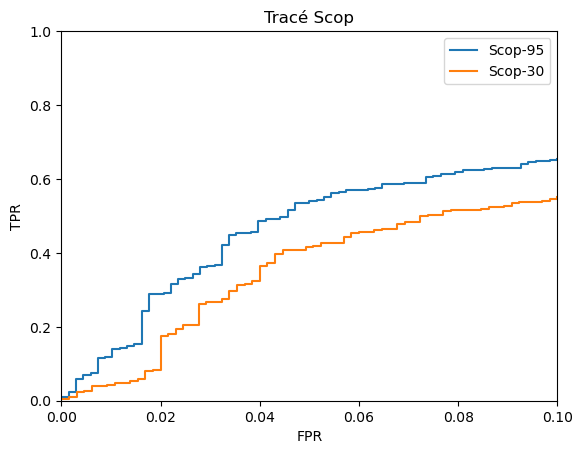

In [26]:
def plotROC(rep, nom, total):
    
    #Récupération des +
    Classes_pos = rep[0,:]
    
    #Récupération des -
    Classes_neg = np.where(Classes_pos==1, 0, 1)

    #Calcul TP,FN,FP,TN
    TP  = np.cumsum(Classes_pos)
    FN  = TP[-1] - TP
    FP  = np.cumsum(Classes_neg)
    TN  = FP[-1] - FP    
    
    #Calcul du size_ratio
    size_ratio = rep.shape[1]/789

    #Calcul TPR et FPR
    TPR = TP /(TP+FN)
    FPR = FP /(FP+TN)
    
    #Code plot
    plt.plot( FPR/10, TPR*size_ratio, label=nom )
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.ylim(0,1)
    plt.xlim(0,0.1)
    plt.title('Tracé Scop')
    
print(rep_30.shape)
print(rep_95.shape)

plotROC(rep_95, "Scop-95", 789)
plotROC(rep_30, "Scop-30", 789)
plt.legend()

6\. Write a python script to plot the Precision/recall curve. We can use the same strategy of Roc curve to compute the precision  (Y axis)  and recall  (X axis)  curves.

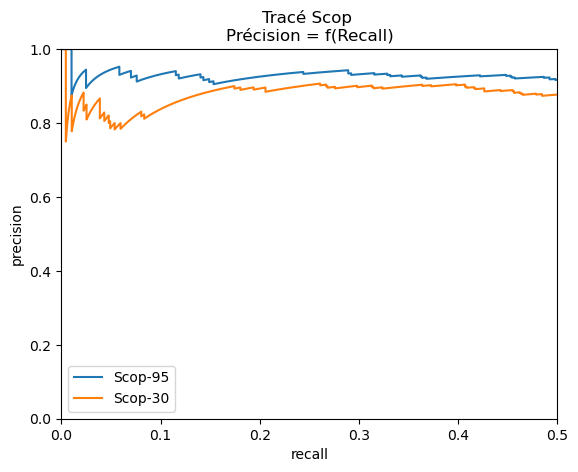

In [27]:
def plotPR(reps, nom, total):
    
    #Récupération des +
    Classes_pos = reps[0,:]
    
    #Récupération des -
    Classes_neg = np.where(Classes_pos==1, 0, 1)
    Seuils      = reps[1,:]
    
    #Calcul TP,FN,FP,TN
    TP  = np.cumsum(Classes_pos)
    FN  = TP[-1] - TP
    FP  = np.cumsum(Classes_neg)
    TN  = FP[-1] - FP 
    
    #Calcul size_ratio
    size_ratio = reps.shape[1]/789   
    
    #Calcul precision, recall
    precision = TP / (TP+FP)
    recall    = TP / (TP+FN)

    #Calcul plot
    plt.plot( recall*size_ratio, precision, label=nom )
    plt.xlabel('recall')
    plt.xlim(0,0.5)
    plt.ylim(0,1)
    plt.ylabel('precision')
    plt.title('Tracé Scop \nPrécision = f(Recall)')

        
plotPR(rep_95, "Scop-95", 789)
plotPR(rep_30, "Scop-30", 789)
plt.legend()

7\. Repeat steps 1 to 6 also for the scop-30 dataset and compare the curves obtained for the two SCOP datasets, what is your conclusion? Include the curves in your answer


<font color="blue">
Conclusion  : L'éxécution est faite en même temps pour scop_95 et scop_30.  
En termes de performance
<font>

Nous avons dû diviser le FPR par 10 pour obtenir la courbe résultante que vous avez obtenu pour le ROC mais nous ne comprenons pas pourquoi nous devons obtenir cela.